In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data'][:, (2, 3)]
y = iris['target']

In [3]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [4]:
np.random.seed(42)

In [5]:
def train_valid_test_split(X, y, valid_ratio=0.2, test_ratio=0.2):
    
    size = len(X)
    valid_size = int(size * valid_ratio)
    test_size = int(size * test_ratio)
    train_size = size - valid_size - test_size
    
    rnd_indices = np.random.permutation(size)
    X_train = X[rnd_indices[:train_size]]
    y_train = y[rnd_indices[:train_size]]
    X_valid = X[rnd_indices[train_size:-test_size]]
    y_valid = y[rnd_indices[train_size:-test_size]]
    X_test = X[rnd_indices[-test_size:]]
    y_test = y[rnd_indices[-test_size:]]
    
    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [6]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(X_with_bias, y)

In [7]:
def to_one_hot(y):
    
    n_classes = y.max() + 1
    m = len(y)
    y_one_hot = np.zeros((m, n_classes))
    y_one_hot[np.arange(m), y] = 1
    
    return y_one_hot

In [8]:
y_train[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [9]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [10]:
y_train_one_hot = to_one_hot(y_train)
y_valid_one_hot = to_one_hot(y_valid)
y_test_one_hot = to_one_hot(y_test)

In [11]:
def softmax(logits):
    
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    
    return exps / exp_sums

In [12]:
n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train))

In [13]:
eta = 0.01
n_iters = 5000
m = len(X_train)
epsilon = 1e-7

theta = np.random.randn(n_inputs, n_outputs)

In [14]:
for iter in range(n_iters+1):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    if iter % 500 == 0:
        loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1))
        print(f'iteration {iter}, loss : {loss}')
    error = y_proba - y_train_one_hot
    gradients = 1 / m * X_train.T.dot(error)
    theta = theta - eta * gradients

iteration 0, loss : 3.5356045081790177
iteration 500, loss : 0.7698276617097016
iteration 1000, loss : 0.6394784332731978
iteration 1500, loss : 0.5618741363839648
iteration 2000, loss : 0.5095831080853224
iteration 2500, loss : 0.471273775599093
iteration 3000, loss : 0.44155863305230325
iteration 3500, loss : 0.4175598664804123
iteration 4000, loss : 0.3975941721521857
iteration 4500, loss : 0.38060484552797946
iteration 5000, loss : 0.3658905593000994


In [15]:
theta

array([[ 2.44942005, -1.63172695, -3.63642175],
       [-0.61947541,  0.50273412,  0.22142236],
       [-0.96378971,  0.39312153,  2.48742003]])

In [16]:
logits = X_valid.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333

In [17]:
eta = 0.1
n_iters = 5000
m = len(X_train)
epsilon = 1e-7
alpha = 0.1

theta = np.random.randn(n_inputs, n_outputs)

for iter in range(n_iters+1):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    if iter % 500 == 0:
        xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1))
        l2_loss = 1 / 2 * np.sum(np.square(theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(f'iteration {iter}, loss : {loss}')
    error = y_proba - y_train_one_hot
    gradients = 1 / m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * theta[1:]]
    theta = theta - eta * gradients

iteration 0, loss : 4.074160805836161
iteration 500, loss : 0.5159746132958637
iteration 1000, loss : 0.49124622842160703
iteration 1500, loss : 0.4842826626269516
iteration 2000, loss : 0.48172881149189384
iteration 2500, loss : 0.4807092367289707
iteration 3000, loss : 0.4802846688736693
iteration 3500, loss : 0.48010354679755285
iteration 4000, loss : 0.4800251331504283
iteration 4500, loss : 0.4799908689215818
iteration 5000, loss : 0.4799758070182931


In [18]:
logits = X_valid.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333

In [19]:
eta = 0.1
n_iters = 50000
m = len(X_train)
epsilon = 1e-7
alpha = 0.1
best_loss = np.inf

theta = np.random.randn(n_inputs, n_outputs)

for iter in range(n_iters+1):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    error = y_proba - y_train_one_hot
    gradients = 1 / m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * theta[1:]]
    theta = theta - eta * gradients
    
    logits = X_valid.dot(theta)
    y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_valid_one_hot * np.log(y_proba + epsilon), axis=1))
    l2_loss = 1 / 2 * np.sum(np.square(theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iter % 500 == 0:
        print(f'iteration {iter}, loss : {loss}')
    if loss < best_loss:
        best_loss = loss
    else:
        print(f'iteration {iter}, loss : {best_loss} <-early stopping')
        break

iteration 0, loss : 1.7715206020472196
iteration 500, loss : 0.5707532983595428
iteration 1000, loss : 0.545946882198638
iteration 1500, loss : 0.5380948912189549
iteration 2000, loss : 0.5349265834600064
iteration 2500, loss : 0.5335454107098025
iteration 3000, loss : 0.5329073608729564
iteration 3500, loss : 0.5325963465739497
iteration 4000, loss : 0.5324366553661258
iteration 4500, loss : 0.5323504675033873
iteration 5000, loss : 0.5323017576862805
iteration 5500, loss : 0.5322730965149327
iteration 6000, loss : 0.5322556606856291
iteration 6500, loss : 0.5322447728304798
iteration 7000, loss : 0.5322378391451005
iteration 7500, loss : 0.5322333602722991
iteration 8000, loss : 0.5322304378296702
iteration 8500, loss : 0.532228517572195
iteration 9000, loss : 0.5322272497623664
iteration 9500, loss : 0.5322264099879318
iteration 10000, loss : 0.5322258525122914
iteration 10500, loss : 0.5322254818903361
iteration 11000, loss : 0.5322252352484067
iteration 11500, loss : 0.53222507100

In [20]:
logits = X_valid.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333

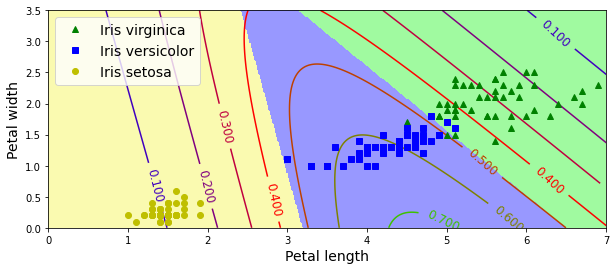

In [21]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [22]:
logits = X_test.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9666666666666667